In [ ]:
import pandas as pd

# Load Titanic dataset (use your actual file path if it's local)
df = pd.read_csv('/home/unix/Downloads/train.csv')  # Or your actual file name
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
# Select relevant numerical features
features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
num_df = df[features]


In [ ]:
from sklearn.impute import SimpleImputer

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
num_df_imputed = pd.DataFrame(imputer.fit_transform(num_df), columns=features)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df_imputed)


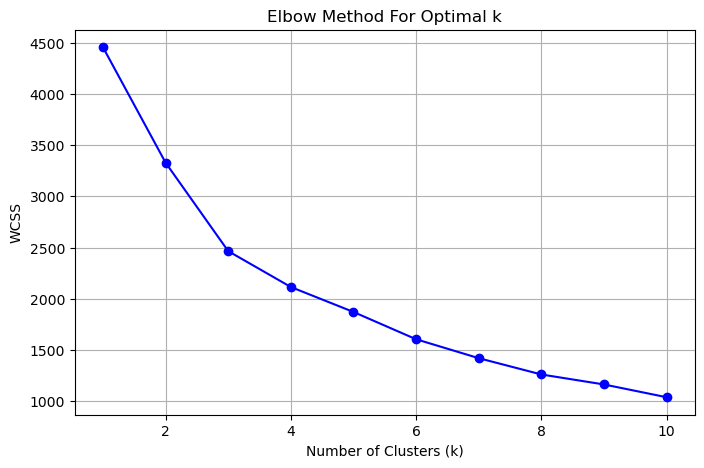

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [ ]:
# Fit K-Means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original dataframe
df['Cluster'] = clusters


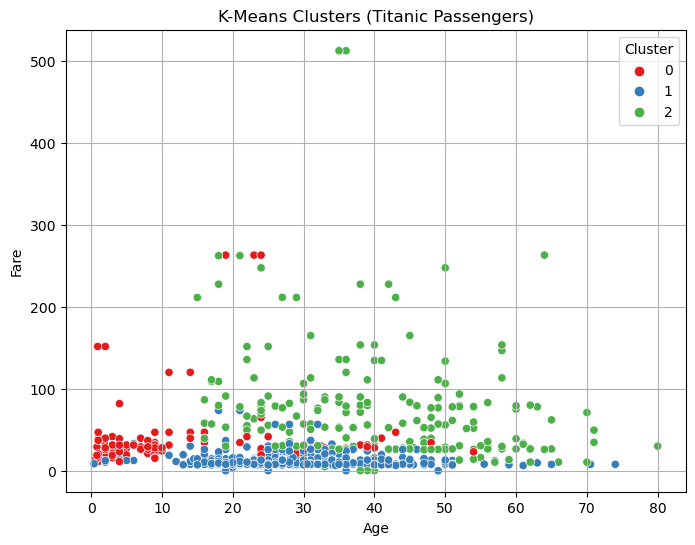

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Cluster', palette='Set1')
plt.title('K-Means Clusters (Titanic Passengers)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(scaled_data, clusters)

print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.42157628006919756
